In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

/tmp/ipykernel_10267/1118879346.py:3: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(g, prog="circo")


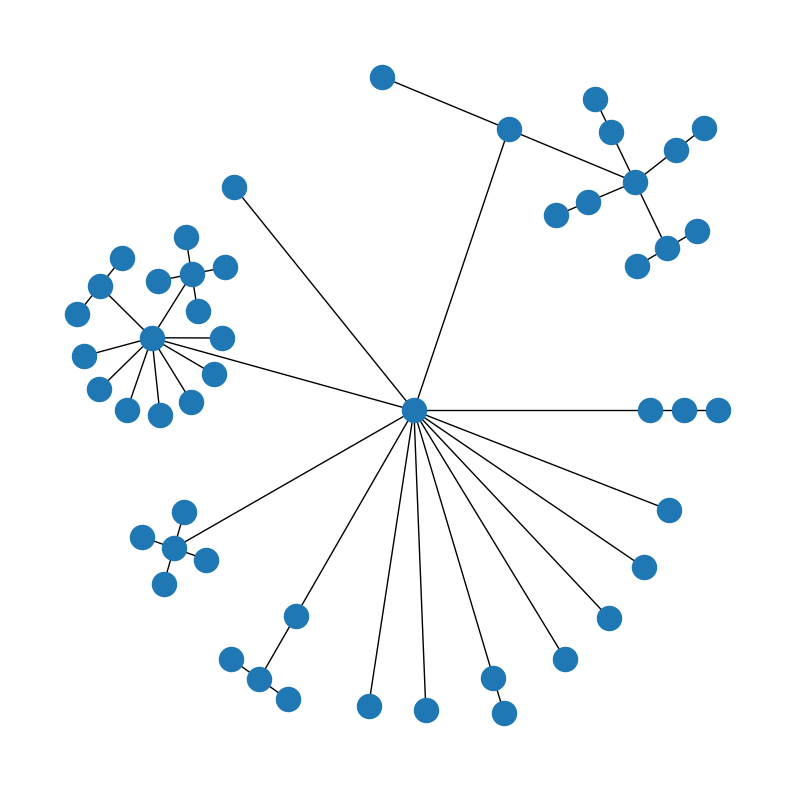

In [2]:
g = nx.barabasi_albert_graph(n=50, m=1)

pos = graphviz_layout(g, prog="circo")

fig, ax = plt.subplots(1,1, figsize=(10,10))
nx.draw(g, pos=pos, ax=ax)


In [3]:
communities = nx.community.greedy_modularity_communities(g)
communities

[frozenset({2, 11, 14, 18, 26, 27, 38, 40, 41, 43, 44, 47}),
 frozenset({4, 10, 13, 17, 20, 22, 23, 33, 35, 36, 39}),
 frozenset({0, 3, 9, 21, 25, 28, 29, 31, 42, 46}),
 frozenset({5, 30, 32, 37, 45}),
 frozenset({12, 15, 16, 24, 49}),
 frozenset({6, 8, 34, 48}),
 frozenset({1, 7, 19})]

In [4]:
tab_colors = [
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
]

In [5]:
import colorsys

def get_N_HexCol(N=5):
    HSV_tuples = [(x * 1.0 / N, 0.5, x * 1.0 / N) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    return hex_out

get_N_HexCol(len(communities))


colors = tab_colors if len(communities) <= len(tab_colors) else get_N_HexCol(len(communities))

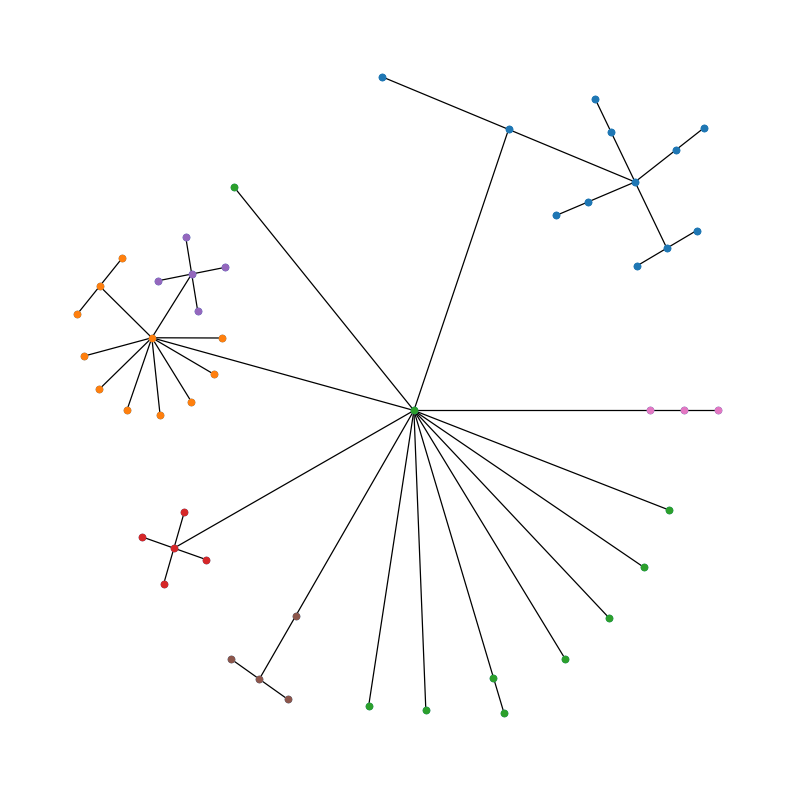

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

nx.draw(g, pos, edge_color='k', node_size=20, width= 0.9, ax=ax)


for i, c in enumerate(communities):
    nx.draw_networkx_nodes(g, pos, nodelist=c, node_color=colors[i], node_size=20, ax=ax)

    

In [7]:
from itertools import combinations

node_subsets = set(combinations(g.nodes, 4))
subgraphs = [nx.induced_subgraph(g, s) for s in node_subsets]
connected_subgraphs = [subgraphs for subgraphs in subgraphs if nx.is_connected(subgraphs)]

In [8]:
def has_branch(g):
    for n in g.nodes:
        if len(list(g.neighbors(n))) > 2:
            return True
    return False

In [9]:
dash_count = len([s for s in connected_subgraphs if not has_branch(s)])
fork_count = len([s for s in connected_subgraphs if has_branch(s)])

In [10]:
dash_count

301

In [11]:
fork_count

440

In [21]:
from statistics import mean, stdev

degrees = dict(g.degree).values()

degree_mean, degree_stdev = mean(degrees), stdev(degrees)

hubs = [n for n in g.nodes if g.degree[n] >= degree_mean + degree_stdev]
hubs

[0, 4, 5, 11, 12]

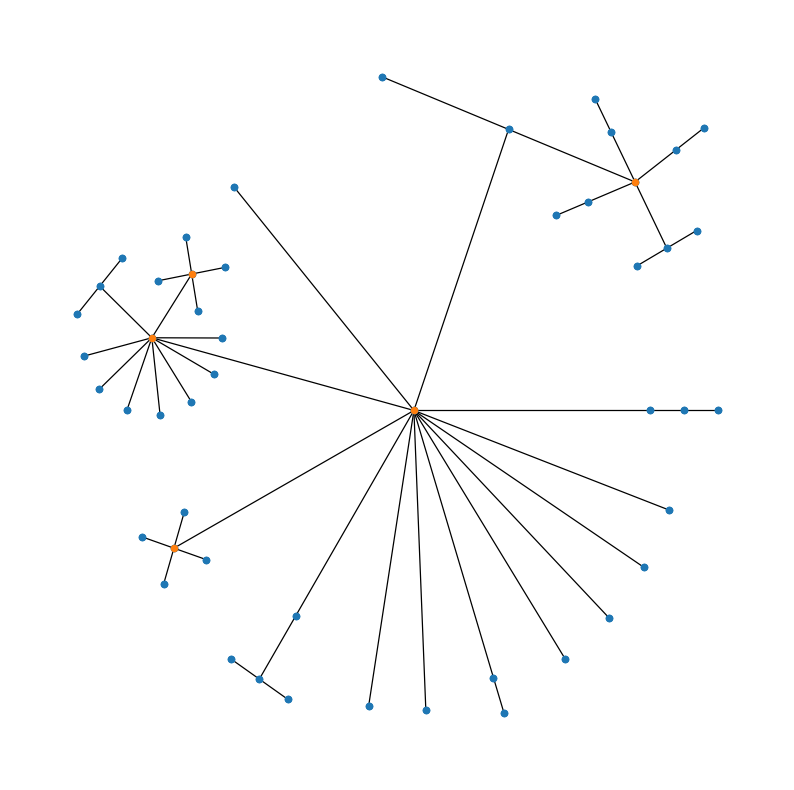

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

nx.draw(g, pos, edge_color='k', node_size=20, width= 0.9, ax=ax)

nx.draw_networkx_nodes(g, pos, nodelist=g.nodes, node_color=colors[0], node_size=20, ax=ax)

nx.draw_networkx_nodes(g, pos, nodelist=hubs, node_color=colors[1], node_size=20, ax=ax)

    